# 목표 : 생선 품종 분류 모델
- 데이터 : fish.csv
- feature : weight, length
- target : Species
- 기계학습 : 지도학습 + 이진분류

## <hr>1. 모듈 로딩 및 데이터 준비

In [1]:
import pandas as pd # 데이터 준비에 사용

In [8]:
data_file = "../data/fish.csv"
fishDF = pd.read_csv(data_file, usecols = [0, 1, 2])
# fishDF = pd.read_csv(data_file, usecols = ["Species", "Weight", "Length"]) # 윗줄과 같은 표현
fishDF.info() # 기본 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


## <hr>2. 데이터 전처리
- 결측치 isnull isnan, 중복데이터duplicated(), 이상치 unique()

In [16]:
# 이상치
print("fishDF.Species =>", fishDF.Species.unique())
print("fishDF.Weight =>", fishDF.Weight.unique())
print("fishDF.Length =>", fishDF.Length.unique())

fishDF.Species => ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
fishDF.Weight => [ 242.   290.   340.   363.   430.   450.   500.   390.   475.   600.
  700.   610.   650.   575.   685.   620.   680.   725.   720.   714.
  850.  1000.   920.   955.   925.   975.   950.    40.    69.    78.
   87.   120.     0.   110.   150.   145.   160.   140.   169.   161.
  200.   180.   272.   270.   306.   540.   800.    55.    60.    90.
  170.   273.   300.     5.9   32.    51.5   70.   100.    80.    85.
  115.   125.   130.   135.   225.   188.   197.   218.   260.   265.
  250.   320.   514.   556.   840.   690.   900.   820.  1015.  1100.
  345.   456.   510.   567.   770.  1250.  1600.  1550.  1650.     6.7
    7.5    7.     9.7    9.8    8.7   10.     9.9   12.2   13.4   19.7
   19.9]
fishDF.Length => [25.4 26.3 26.5 29.  29.7 30.  30.7 31.  31.5 32.  33.  33.5 34.  34.5
 35.  36.  37.  38.5 39.5 41.  14.1 18.2 18.8 19.8 20.  20.5 20.8 21.
 22.  22.5 24.  23.4 23.5 25.2 26.

In [17]:
fishDF.isna().sum() # 없지라...

Species    0
Weight     0
Length     0
dtype: int64

In [18]:
# 중복 데이터 -> duplicated()
fishDF.duplicated().sum() # 삭제하고 싶으면 drop duplicated

4

## <hr>3. 학습용 데이터 준비  

### Bream, Smelt 두 품종의 row만 뽑기 

In [65]:
twoFishDF = fishDF[fishDF["Species"].isin(("Bream", "Smelt"))]

# 인덱스 리셋
# Scikit-learn에 저장 시 ndarray 타입으로 저장되면서 인덱스 정리 !! 중요
twoFishDF = twoFishDF.reset_index(drop=True)

twoFishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [66]:
# 피쳐 데이터 추출
feature = twoFishDF[twoFishDF.columns[1:]]
feature.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [67]:
# 타겟 데이터 추출
target = twoFishDF.Species
target = target.replace({"Bream":0, "Smelt":1}).copy()

target.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### 데이터 이진화 Bream -> 0, Smelt -> 1

In [68]:
target = target.replace({"Bream":0, "Smelt":1}).copy() # warning 꼴보기 싫어서 넣는 거
# 인덱스 reset

target

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
Name: Species, dtype: int64

## <hr> 4. 학습 진행
> - 알고리즘 구현 인스턴스 생성 => 지도학습 -분류 알고리즘 중 선택
> - 학습 진행 메서드 => __fit()__

In [69]:
### 4-1. KNN 인스턴스 생성

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
model = KNeighborsClassifier()

model

KNeighborsClassifier()

In [75]:
### 4-2. 학습 (2D, 1D)
model.fit(feature, target)


KNeighborsClassifier()

In [76]:
# 학습 후 속성 확인
# _붙은 애들은 학습이 끝나야 볼 수 있음
print("classes_ :", model.classes_)
print("feature_names_in_ :", model.feature_names_in_)
print("n_features_in_ :", model.n_features_in_)

classes_ : [0 1]
feature_names_in_ : ['Weight' 'Length']
n_features_in_ : 2


## 5. 학습 후 검사 = test

In [77]:
# 모듈 로딩 -> score
model.score(feature, target) # 원래는 이러면 안됨 1.0나오면 100점인겨

1.0

## 6. 예측 즉 서비스에 모델 활용 시 사용 => 메서드 : predict()
- 조건 : 학습 시 전달된 데이터와 동일한 형태의 데이터 전달

In [80]:
pred_y = model.predict([[19.9, 15]]) # 학습 시 제공된 데이터와 다른 형

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


feture name이 없어서 오류가 남 형태를 맞춰!!!

In [81]:
new_df =pd.DataFrame([[19.9, 15]], columns = model.feature_names_in_) # 학습 시 제공된 데이터와 다른 형

pred_y = model.predict(new_df) # 학습 시 제공된 데이터와 다른 형
pred_y # 결과 

array([1], dtype=int64)

In [89]:
new_df

,Weight,Length
0,19.9,15


In [82]:
# 예측 확률 
model.predict_proba(new_df)


array([[0., 1.]])

In [100]:
# 데이터와 최근접 이웃 데이터
dis, ind = model.kneighbors(new_df)
model.kneighbors(new_df)

(array([[0.        , 0.72801099, 7.00071425, 7.95550124, 8.19328994]]),
 array([[48, 47, 45, 46, 44]], dtype=int64))

위에 거는 가까이 있는 것들과의 거리 
밑에 거는 번호 

In [102]:
ind.tolist()[0] # feature iloc에 집어 넣으면 군집 거르기 가능!!

[48, 47, 45, 46, 44]

In [104]:
# k개의 최근접 이웃 데이터
k_DF = feature.iloc[ind.tolist()[0]]
k_DF

,Weight,Length
48,19.9,15.0
47,19.7,14.3
45,13.4,12.4
46,12.2,13.0
44,12.2,12.2


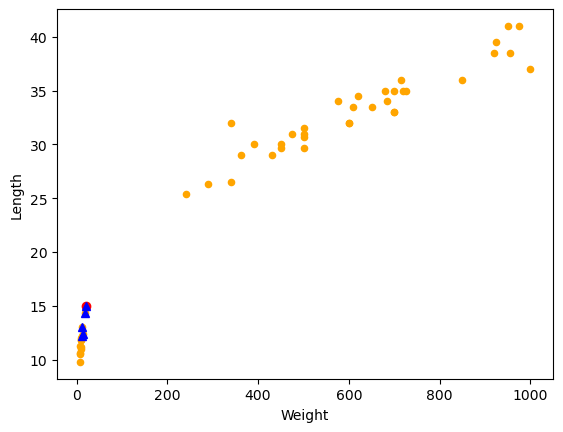

In [106]:
# pandas의 SR, DF의 plot() 메서드 
colomap = ["orange", "blue"] # color map 객체 생성
feature.plot.scatter(x="Weight", y="Length", c='orange')
plt.plot(new_df.Weight[0], new_df.Length[0], "ro") # 새로운 데이터
plt.plot(k_DF.Weight, k_DF.Length, "b^") # 새로운 데이터

In [52]:
# matplotlib 활용
import matplotlib.pyplot as plt

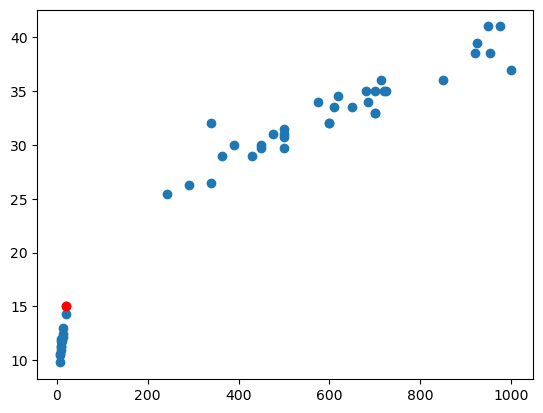

In [95]:
plt.scatter(x = feature.Weight, y = feature.Length) # 데이터 시각화 
plt.plot(new_df.Weight[0], new_df.Length[0], "ro") # 새로운 데이터
plt.show()